
### Description

### Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.


# Columns
#id listing ID
#name name of the listing
#host_id host ID
#host_name name of the host
#neighbourhood_group location
#neighbourhood area
#latitude latitude coordinates
#longitude longitude coordinates
#room_type listing space type
#price price in dollars
#minimum_nights amount of nights minimum
#number_of_reviews number of reviews
#last_review latest review
#reviews_per_month number of reviews per month
#calculated_host_listings_count amount of listing per host

# Content

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.


# Inspiration
#What can we learn about different hosts and areas?
#What can we learn from predictions? (ex: locations, prices, reviews, etc)
#Which hosts are the busiest and why?
#Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset=pd.read_csv('/home/gaurav/Documents/various datasets/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [3]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
print(dataset.keys())

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [5]:
dataset.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
len(dataset)

48895

In [7]:
dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
#What can we learn about different hosts and areas?

In [9]:
dataset.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
dataset.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
dataset.select_dtypes(include='object').head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


In [12]:
dataset=dataset.fillna(0)

In [13]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [14]:
dataset.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
#host and area

In [16]:
host_area=dataset[['host_name','neighbourhood','price']]
host_area.head()

,host_name,neighbourhood,price
0,John,Kensington,149
1,Jennifer,Midtown,225
2,Elisabeth,Harlem,150
3,LisaRoxanne,Clinton Hill,89
4,Laura,East Harlem,80


In [17]:
host_area1=pd.pivot_table(data=host_area, index='neighbourhood',values='price',aggfunc=sum).head(10)
b=host_area1.nlargest(10, columns='price', keep='first')
b['price']

neighbourhood
Astoria                       105469
Battery Park City              25729
Bay Ridge                      20365
Arverne                        13227
Allerton                        3679
Arrochar                        2415
Bath Beach                      1390
Bay Terrace                      852
Arden Heights                    269
Bay Terrace, Staten Island       205
Name: price, dtype: int64

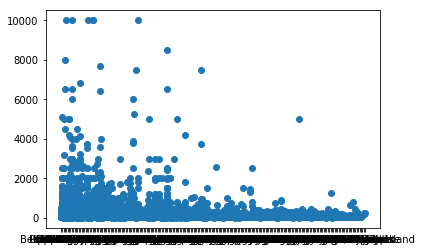

In [18]:
plt.scatter(x=dataset['neighbourhood'],y=dataset['price'])

([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([   205. ,  10731.4,  21257.8,  31784.2,  42310.6,  52837. ,
         63363.4,  73889.8,  84416.2,  94942.6, 105469. ]),
 <a list of 10 Lists of Patches objects>)

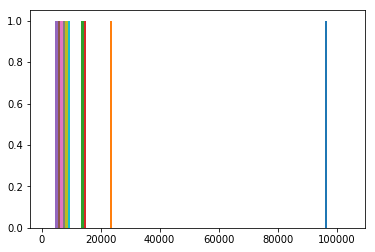

In [19]:
plt.hist(b)

In [20]:
df=dataset[['neighbourhood','price']]

In [21]:
df.head()

,neighbourhood,price
0,Kensington,149
1,Midtown,225
2,Harlem,150
3,Clinton Hill,89
4,East Harlem,80


In [22]:
#What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [23]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [24]:
dataset=dataset.drop(columns='last_review')


In [25]:
x=dataset.iloc[:,9:-1].values
#x=x.drop(columns='last_review')


In [26]:
x

array([[1.49e+02, 1.00e+00, 9.00e+00, 2.10e-01, 6.00e+00],
       [2.25e+02, 1.00e+00, 4.50e+01, 3.80e-01, 2.00e+00],
       [1.50e+02, 3.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [1.15e+02, 1.00e+01, 0.00e+00, 0.00e+00, 1.00e+00],
       [5.50e+01, 1.00e+00, 0.00e+00, 0.00e+00, 6.00e+00],
       [9.00e+01, 7.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]])

In [27]:
y=dataset.iloc[:,14].values

In [28]:
y

array([365, 355, 365, ...,  27,   2,  23])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((32596, 5), (16299, 5), (32596,), (16299,))

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
regression = LinearRegression()

In [34]:
regression.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)
print('pridict: \n', regression.predict(x))

Intercept: 
 74.30298799469337
Coefficients: 
 [0.04145361 0.88758927 0.39627172 9.56964373 0.87418536]
pridict: 
 [ 92.18834831 107.73470276  84.05798296 ...  88.82023142  82.71563811
  85.12112332]


In [36]:
y_prid=regression.predict(x_test)

In [37]:
y_prid

array([ 87.16700387, 108.77737292,  99.13030794, ..., 127.30529667,
        86.18307796, 143.63636863])

In [38]:
#DTR

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
dtr=DecisionTreeRegressor()

In [41]:
dtr.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [42]:
dtr_y_prid=dtr.predict(x_test)

In [43]:
print('Predict: \n', dtr.predict(x))

Predict: 
 [365.         355.          52.37735849 ...  13.5         32.
  16.5       ]


In [44]:
dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [45]:
#Which hosts are the busiest and why?

In [46]:
set(dataset['room_type'])

{'Entire home/apt', 'Private room', 'Shared room'}

In [48]:
hosts_busy=dataset.groupby(['host_name','availability_365'])

In [49]:
hosts_busy.max()

calculated_host_listings_count  \
host_name                availability_365                                   
0                        0                                              3   
                         26                                             1   
                         69                                             1   
                         88                                             1   
                         217                                            1   
                         318                                            2   
                         342                                            2   
                         359                                            1   
'Cil                     298                                            1   
(Ari) HENRY LEE          56                                             1   
(Email hidden by Airbnb) 0                                              2   
                         170                                            2   
                         188                                            1   
(Mary) Haiy              295                                            1   
-TheQueensCornerLot      248                                            1   
0123                     365                                            1   
2018Serenity             32                                             1   
371                      141                                            1   
475                      178                                            4   
                         180                                            4   
5 Star Stays             321                                            1   
@ Art House Monique      26                                             4   
                         114                                            4   
                         118                                            4   
                         165                                            4   
A                        0                                              1   
                         17                                             1   
                         76                                             1   
                         148                                            1   
                         316                                            2   
...                                                                   ...   
正川                       20                                             2   
泽宇                       23                                             2   
                         53                                             2   
睿                        0                                              1   
祥茵                       0                                              2   
筱                        211                                            1   
美德                       205                                            5   
                         210                                            5   
                         230                                            5   
                         235                                            5   
                         236                                            5   
莹                        190                                            1   
诗月                       0                                              1   
辣辣                       0                                              1   
铀 Yuli                   6                                              3   
                         33                                             3   
                         180                                            3   
青明                       186                                            5   
                         222                                            5   
                         224           

In [50]:
#Is there any noticeable difference of traffic among different areas and what could be the reason for it?

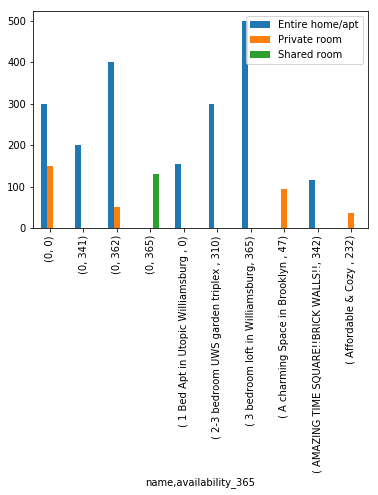

In [51]:

traffic=pd.pivot_table(dataset,index=['name','availability_365'],columns='room_type',values='price',aggfunc={'price' :max}).head(10)
traffic.plot(kind="bar").legend()